[[ 2차 시험 : 분류모델의 성능평가 ]]  
1.
싸이런킷에서 제공하는 분석용 데이터를 임시로   
특성 20개까지 데이터 10000개를  
만들어라.(동일한 성능을 내기 위해 난수씨드를   
고정해도 괜찮음)  
2.  
아래 5개의 분류기를 이용하여   
예측 성능 평가를 진행하라  
- 결정트리분류  
- 로지스틱회귀  
- 랜덤포레스트분류  
- 서포트백터머신분류  
- 나이브베이즈  
3. 
성능 평가 결과는   
- ROC curve 시각화 자료  
- AUC 값  
2가지를 기초로 결과를 제시하시오  

In [1]:
import sklearn.datasets as mls
import pandas as pd

In [2]:
#분류파일 생성 n_samples=10000, n_features=20
data = mls.make_classification(n_samples=10000, n_features=20)

In [3]:
X,Y= data # 데이터를 data와 label로 쪼갠다.

In [4]:
#레이블 확인
pd.unique(Y)

array([1, 0], dtype=int64)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
#train,test 셋 분리한다.
train_X,test_X,train_Y,test_Y = train_test_split(X,Y)

In [7]:
# 데이터가 원하는 형태로 쪼개졌는지 확인.
train_X.shape

(7500, 20)

In [8]:
train_Y.shape

(7500,)

In [9]:
test_X.shape

(2500, 20)

In [10]:
#roc 커브 
from sklearn.metrics import roc_curve
#로지스틱
from sklearn.linear_model import LogisticRegression
# 결정 트리 분류
from sklearn.tree import DecisionTreeClassifier
# 랜덤포레스트 분류
from sklearn.ensemble import RandomForestClassifier
# 나이브베이즈 가우시안
from sklearn.naive_bayes import GaussianNB
#auc
from sklearn.metrics import auc 

In [11]:
#라벨,라인타입,모델 리스트(튜플)
CLASS_DICT = {
    # 키(분류기의 이름) : (시각화 선의 모양, 분류기 객체 )
    '로지스틱회귀':('-', LogisticRegression()),
    '결정트리분류':('--', DecisionTreeClassifier(max_depth=5) ),
    '랜덤포레스트':('.-', RandomForestClassifier(max_depth=5, n_estimators = 10, max_features=1 )),
    '나이브베이즈':(':', GaussianNB() )        
}

In [1]:
#시각화 한글화
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
# 한글처리
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':    # 맥
    rc( 'font', family='AppleGothic' )
elif platform.system() == 'Windows': # 윈도우
    # 폰트 차후 확인
    fontPath = 'c:/Windows/Fonts/malgun.ttf'
    fontName = font_manager.FontProperties( fname=fontPath ).get_name()
    rc( 'font', family=fontName )
else:
    print('알수없는 시스템. 미적용')

In [3]:
%matplotlib inline

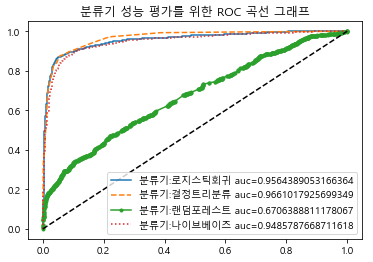

In [13]:
#시각화및 auc
for label,(line_type,model) in CLASS_DICT.items():
    #모델학습
    model.fit(train_X,train_Y)
    # 각각의 레이블을 예측할 확률을 계산.
    pred = model.predict_proba(test_X)
    #계산할부분(여기서는 1을 예측할 확률)
    pre = pd.Series(pred[:,1])
    #roc커브에 필요한 계산
    fpr, tpr, threshold = roc_curve(test_Y,pre)
    #auc계산
    aucScore = auc(fpr,tpr)
    # auc값과 분류기 이름을 레이블로 등록
    label = '분류기:%s auc=%r' % (label,aucScore) 
    #그림그리기
    plt.plot(fpr,tpr,line_type, label=label)
#범례표시
plt.legend()
#제목
plt.title('분류기 성능 평가를 위한 ROC 곡선 그래프')
# 대각선 점선 - 최소값
plt.plot([0,1],[0,1], 'k--')   

왼쪽 위를 향하는 그래프가 가장 좋으니 결정 트리가 가장 좋은걸 알 수 있다.   
auc 값을 비교 했을때 결정 트리가 0.966으로 가장 높음을 알 수 있다.  
따라서 결정 트리가 가장 분류를 잘하는 모델이라고 할 수 있다.  
